# Fluxonium properties

This notebook describes basic properties of a fluxonium circuit

## Import

In [73]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import plotting_settings
import ipywidgets as widgets
from matplotlib.widgets import Slider

In [74]:
%matplotlib inline

In [75]:
%pwd

'/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/Notebooks'

## Qubit parameters

In [76]:
N = 30 #number of levels
E_J = 4 #Josephson energy, GHz
E_C = 1 #Charging energy, GHz
E_L = 1 #Inductive energy, GHz
level_num = 10
phi_ext = np.linspace(0,1,201)
energies = np.zeros((len(phi_ext), level_num))
states = np.zeros((len(phi_ext), level_num, N))
max_display_y = 10

## Spectrum

In [77]:
for idx, phi in enumerate(phi_ext):
    H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J, phi*2*np.pi)
    energies[idx, :] = H.eigenenergies()[:level_num]


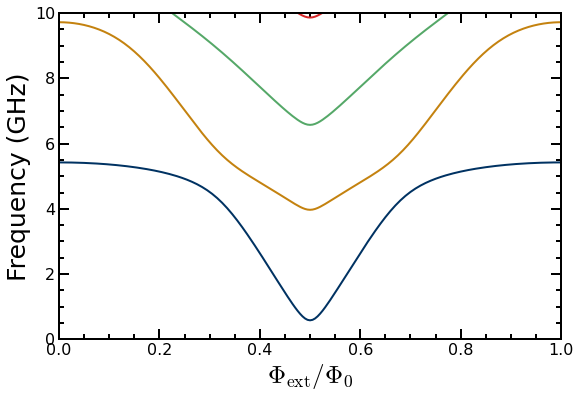

In [78]:
plt.figure(figsize=[9,6])
plt.xlim([phi_ext[0], phi_ext[-1]])
plt.ylim([0,max_display_y])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('Frequency (GHz)')
for idx in range(1,level_num):
    plt.plot(phi_ext, energies[:,idx]-energies[:,0], linewidth = '2')

## Wavefunctions
Plot the wave functions in phase basis

In [79]:
#note that we write the Hamiltonian and operators in the harmonic oscillator basis,
#so now we have to project the evectors onto the phase basis.
def ho_wf(phi,l,Ec,El):
    ratio = (8.0*Ec/El)**(0.25)
    coeff = (2.0**l*np.math.factorial(l)*np.sqrt(np.pi)*ratio)**(-0.5)
    return coeff * np.exp(-0.5*(phi/ratio)**2) * hpoly(l,phi/ratio)

toPlotNum = 5
# phi_ext=[0.5]
phi = np.linspace(-3*np.pi,3*np.pi,101)
waveFunc = np.zeros((len(phi), len(phi_ext), toPlotNum))
potential = np.zeros((len(phi), len(phi_ext)))
for phi_idx, phi_e in enumerate(phi_ext):
    H = fluxonium.bare_hamiltonian(N,E_L,E_C,E_J, phi_e*2*np.pi)
    evalues, evectors = H.eigenstates()
    for state_idx in range(toPlotNum):
        wFunc = np.zeros(len(phi))
        for lvl_idx in range(N):
            coeff = np.real(evectors[state_idx].full()[lvl_idx, 0])
            wFunc = wFunc + coeff*ho_wf(phi, lvl_idx, E_C, E_L)
        waveFunc[:, phi_idx, state_idx] = wFunc + evalues[state_idx]
    potential[:,phi_idx] = 0.5*E_L*phi**2 - E_J*np.cos(phi-phi_e*2*np.pi)   
    

(-5.0, 20.0)

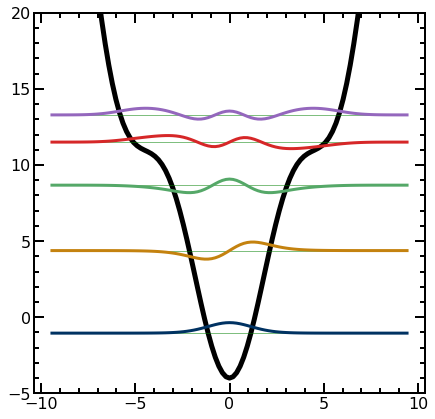

In [80]:
plt.figure(figsize = [7,7])
phi_idx = 0   
plt.plot(phi,potential[:, phi_idx], linewidth = 5, color = 'k')
for state_idx in range(toPlotNum):
    plt.plot(phi,np.ones(len(phi))*energies[phi_idx,state_idx], linewidth = 1, alpha = 0.5, color = 'g')
    plt.plot(phi,waveFunc[:, phi_idx, state_idx])
plt.ylim([-5,20])

(-1.0, 15.0)

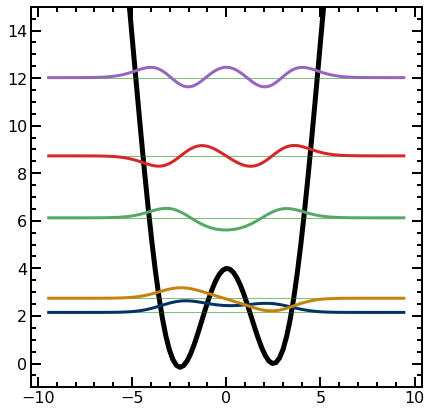

In [81]:
plt.figure(figsize = [7,7])
phi_idx = 101
plt.plot(phi,potential[:, phi_idx], linewidth = 5, color = 'k')
for state_idx in range(toPlotNum):
    plt.plot(phi,np.ones(len(phi))*energies[phi_idx,state_idx], linewidth = 1, alpha = 0.5, color = 'g')
    plt.plot(phi,waveFunc[:, phi_idx, state_idx])
plt.ylim([-1,15])

## Matrix elements

In [82]:
toCompute = 3 #Number of transitions to compute
n_me = np.zeros((len(phi_ext), toCompute), dtype = complex)
p_me = np.zeros_like(n_me)

for idx, phi in enumerate(phi_ext):
    n_me[idx, 0] = fluxonium.charge_matrix_element(N, E_L, E_C, E_J, phi*2*np.pi, 0, 1)
    p_me[idx, 0] = fluxonium.phase_matrix_element(N, E_L, E_C, E_J, phi*2*np.pi, 0, 1)
    n_me[idx, 1] = fluxonium.charge_matrix_element(N, E_L, E_C, E_J, phi*2*np.pi, 2, 1)
    p_me[idx, 1] = fluxonium.phase_matrix_element(N, E_L, E_C, E_J, phi*2*np.pi, 2, 1)
    n_me[idx, 2] = fluxonium.charge_matrix_element(N, E_L, E_C, E_J, phi*2*np.pi, 0, 2)
    p_me[idx, 2] = fluxonium.phase_matrix_element(N, E_L, E_C, E_J, phi*2*np.pi, 0, 2)

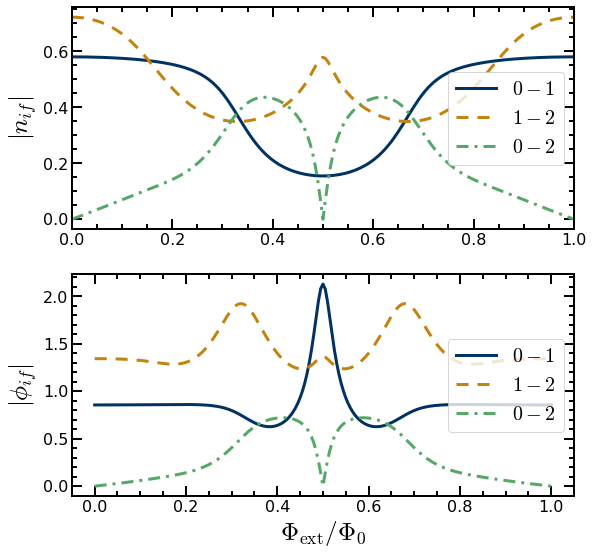

In [83]:
fig, (ax1, ax2) = plt.subplots(2, figsize=[9,9])
ax1.set_xlim([phi_ext[0], phi_ext[-1]])
ax2.set_xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
ax1.set_ylabel(r'$|n_{if}|$')
ax2.set_ylabel(r'$|\phi_{if}|$')
ax1.plot(phi_ext, abs(n_me[:, 0]), linewidth = '3', label = r'$0-1$')
ax2.plot(phi_ext, abs(p_me[:, 0]), linewidth = '3', label = r'$0-1$')
ax1.plot(phi_ext, abs(n_me[:, 1]), linewidth = '3', linestyle = '--', label = r'$1-2$')
ax2.plot(phi_ext, abs(p_me[:, 1]), linewidth = '3', linestyle = '--', label = r'$1-2$')
ax1.plot(phi_ext, abs(n_me[:, 2]), linewidth = '3', linestyle = '-.', label = r'$0-2$')
ax2.plot(phi_ext, abs(p_me[:, 2]), linewidth = '3', linestyle = '-.', label = r'$0-2$')
ax1.legend(loc='best')
ax2.legend(loc='right')

## Dispersive shifts 
First, simulate dispersive shift across the flux range

In [84]:
iState = 0
fState = 1
g = 0.1 #Coupling to cavity, GHz
w_R = 7.5 #Readout frequency, GHz
chi_01 = np.zeros_like(phi_ext)
for idx, phi in enumerate(phi_ext):
    chi_01[idx]= fluxonium.charge_dispersive_shift(N, level_num, E_L, E_C, E_J, phi*2*np.pi, iState, fState, w_R, g)

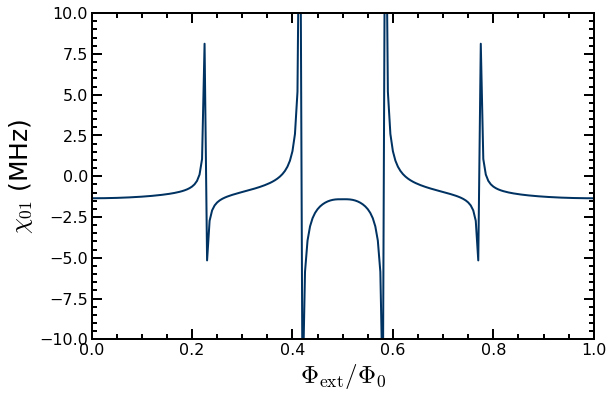

In [85]:
plt.figure(figsize=[9,6])
plt.xlim([phi_ext[0], phi_ext[-1]])
plt.ylim([-10,10])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel(r'$\chi_{01}$ (MHz)')
plt.plot(phi_ext, chi_01*1e3, linewidth = '2')

Simulate dispersive shift with varying resonator frequency

In [86]:
iState = 0
fState = 1
g = 0.1 #Coupling to cavity, GHz
w_R_array = np.linspace(4,10,101) #Readout frequency, GHz
chi_R_01 = np.zeros_like(w_R_array)
for idx, w_R in enumerate(w_R_array):
    chi_R_01[idx]= fluxonium.charge_dispersive_shift(N, level_num, E_L, E_C, E_J, np.pi, iState, fState, w_R, g)

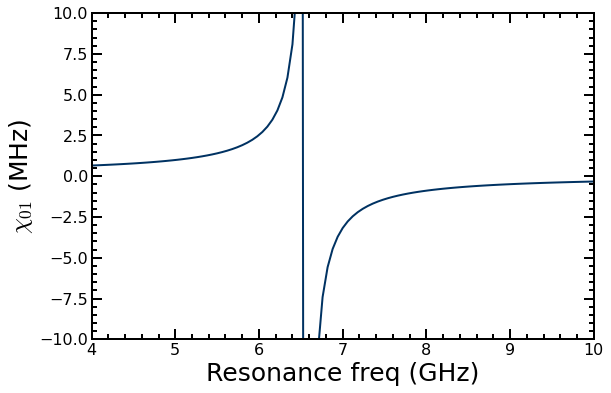

In [87]:
plt.figure(figsize=[9,6])
plt.xlim([w_R_array[0], w_R_array[-1]])
plt.ylim([-10,10])
plt.xlabel(r'Resonance freq (GHz)')
plt.ylabel(r'$\chi_{01}$ (MHz)')
plt.plot(w_R_array, chi_R_01*1e3, linewidth = '2')

## Energy relaxation

### Dielectric loss

In [88]:
freq = energies[:,1]-energies[:,0]
h = 6.626e-34 #Planck constant
kB = 1.38e-23 #Boltzmann constant
T_diel = 20e-3 #effective temperature in K
thermal_factor_diel = (1+np.exp(-h*freq*1e9/(kB*T_diel)))
Q_cap_array = [3e6]
gamma_cap  = np.zeros((len(phi_ext), len(Q_cap_array)), dtype = complex)

for Q_idx, Q_cap in enumerate(Q_cap_array):
    for phi_idx in range(len(phi_ext)):
        gamma_cap[phi_idx, Q_idx] = fluxonium.relaxation_rate_cap(E_L, E_C, E_J, Q_cap*(6.0/freq[phi_idx])**0.15, 
                                                                  freq[phi_idx], p_me[phi_idx,0], T_diel)*thermal_factor_diel[phi_idx]

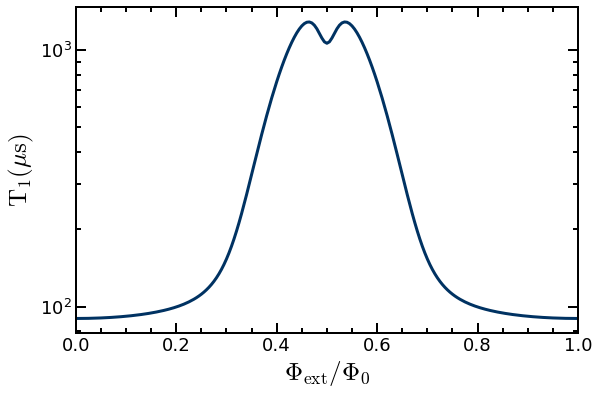

In [89]:
plt.figure(figsize = [9,6])
# plt.ylim([10,3000])
plt.xlim([phi_ext[0], phi_ext[-1]])
plt.tick_params(labelsize = 18.0)
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('$\mathrm{T_1(\mu s)}$')
for idx in range (len(Q_cap_array)):
    plt.semilogy(phi_ext, 1.0/abs(gamma_cap[:,idx]) *1e6, linewidth= 3.0, linestyle ='-')

### Quasiparticles near small junction


In [90]:
#Quasiparticle tunneling across small junction
T_qp = 20e-3 #effective temperature in K
thermal_factor_qp = (1+np.exp(-h*freq*1e9/(kB*T_qp)))
Q_qp_array = [1e6]
gamma_qp = np.zeros((len(phi_ext), len(Q_qp_array)), dtype=complex)
qp_me = np.zeros_like(gamma_qp)
for phi_idx, phi in enumerate(phi_ext):
    qp_me[phi_idx] = abs(fluxonium.qp_matrix_element(N, E_L, E_C, E_J, phi * 2.0 * np.pi, 0, 1))
for Q_idx, Q_qp in enumerate(Q_qp_array):
    for phi_idx in range(len(phi_ext)):
        gamma_qp[phi_idx, Q_idx] = fluxonium.relaxation_rate_qp(E_L, E_C, E_J, Q_qp, freq[phi_idx], 
                                                                      qp_me[phi_idx,0])*thermal_factor_qp[phi_idx]

<ipython-input-91-cd3d368a4636>:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(phi_ext, 1.0/abs(gamma_qp[:,idx]) *1e6, linewidth= 2.0, linestyle ='-')


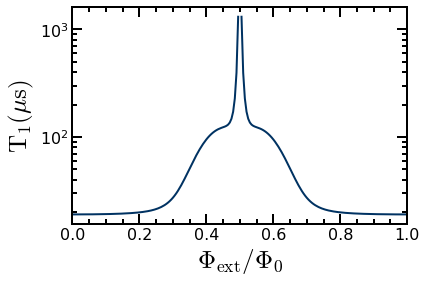

In [91]:
plt.xlim([phi_ext[0], phi_ext[-1]])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('$\mathrm{T_1(\mu s)}$')
for idx in range (len(Q_qp_array)):
    plt.semilogy(phi_ext, 1.0/abs(gamma_qp[:,idx]) *1e6, linewidth= 2.0, linestyle ='-')

### Quasiparticles in the inductor

In [92]:
#Quasiparticle in JJ array. Inductive noise has similar effects.
T_qp = 20e-3 #effective temperature in K
thermal_factor_qp = (1+np.exp(-h*freq*1e9/(kB*T_qp)))
Q_qp_array = [1e9]
gamma_qp_chain = np.zeros((len(phi_ext), len(Q_qp_array)), dtype=complex)
for Q_idx, Q_qp in enumerate(Q_qp_array):
    for phi_idx in range(len(phi_ext)):
        gamma_qp_chain[phi_idx, Q_idx] = fluxonium.relaxation_rate_qp_array(E_L, E_C, E_J, Q_qp, freq[phi_idx], 
                                                                      p_me[phi_idx,0])*thermal_factor_qp[phi_idx]

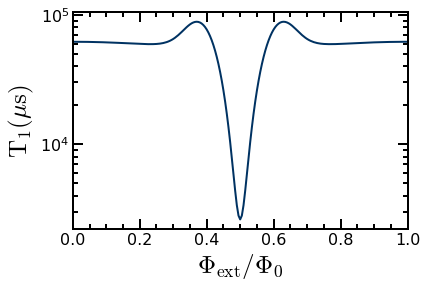

In [93]:
# plt.figure(figsize = [10,8])
# plt.ylim([10,1000])
plt.xlim([phi_ext[0], phi_ext[-1]])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('$\mathrm{T_1(\mu s)}$')
for idx in range (len(Q_qp_array)):
    plt.semilogy(phi_ext, 1.0/abs(gamma_qp_chain[:,idx]) *1e6, linewidth= 2.0, linestyle ='-')

## Flux noise dephasing
We use the formula
$$\Gamma_\Phi = \left(\frac{\partial \omega}{\partial \Phi} \right)A\mathrm{ln}\sqrt{2} $$

(1, 1000)

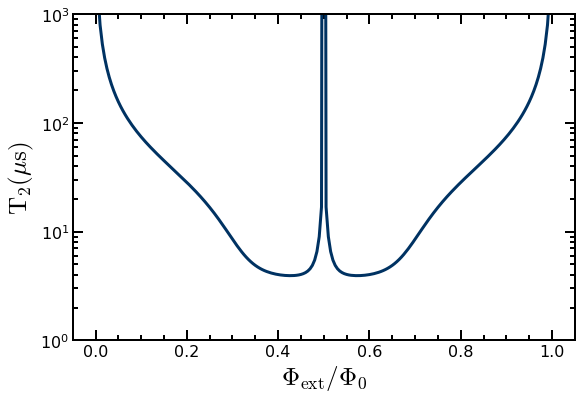

In [94]:
#T2 due to flux noise (measured with echo)
plt.figure(figsize=[9,6])
fn_amp = 2.0e-6 #unit is flux quantum
trans_energy = energies[:,1]-energies[:,0]
sensitivity = np.gradient(trans_energy)/(phi_ext[1]-phi_ext[0]) #in unit of GHz / (Flux/phi_o)
sensitivity = sensitivity*1e9*2*np.pi #Unit of radian Hz / (Flux/phi_o)
gamma = abs(sensitivity)*fn_amp*np.sqrt(np.log(2))
plt.semilogy(phi_ext, (gamma**-1)*1e6)
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel(r'$\mathrm{T_2(\mu s)}$')
plt.ylim([1,1000])

Text(0, 0.5, '$\\mathrm{T_2(s)}$')

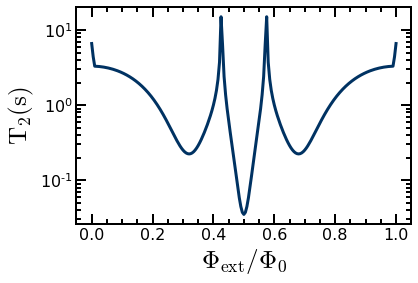

In [95]:
#T2 due to 2nd order flux noise
fn_amp = 2.0e-6 #unit is flux quantum
trans_energy = energies[:,1]-energies[:,0]
sensitivity = np.gradient(trans_energy)/(phi_ext[1]-phi_ext[0]) #in unit of GHz / (Flux/phi_o)
sensitivity2 = np.gradient(sensitivity)/(phi_ext[1]-phi_ext[0]) #in unit of GHz / (Flux/phi_o)^2
sensitivity2 = sensitivity2*1e9*2*np.pi #in unit of radian Hz / (Flux/phi_o)^2
gamma = abs(sensitivity2)*fn_amp**2
plt.semilogy(phi_ext, (gamma**-1))
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel(r'$\mathrm{T_2(s)}$')